In [ ]:
import numpy as np
import tensorflow as tf
import keras
import os, shutil

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

TensorFlow version: 2.8.2
Keras version: 2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = '/Dataset_project_4000'

if not os.path.exists(base_dir):
    os.mkdir(base_dir)

Mounted at /content/drive


In [ ]:
test_CNV_dir='/content/drive/MyDrive/Project/Dataset_project_4000/test/CNV'
test_DRUSEN_dir='Dataset_project_4000/test/DRUSEN'
test_DME_dir='Dataset_project_4000/test/DME'
test_NORMAL_dir='Dataset_project_4000/test/NORMAL'
validation_CNV_dir='Dataset_project_4000/val/CNV'
validation_DRUSEN_dir='Dataset_project_4000/val/DRUSEN'
validation_DME_dir='Dataset_project_4000/val/DME'
validation_NORMAL_dir='Dataset_project_4000/val/NORMAL'
train_CNV_dir='Dataset_project_4000/train/CNV'
train_DRUSEN_dir='Dataset_project_4000/train/DRUSEN'
train_DME_dir='Dataset_project_4000/train/DME'
train_NORMAL_dir='Dataset_project_4000/train/NORMAL'

print('total training CNV images:', len(os.listdir(train_CNV_dir)))
print('total training DRUSEN images:', len(os.listdir(train_DRUSEN_dir)))
print('total training DME images:', len(os.listdir(train_DME_dir)))
print('total training NORMAL images:', len(os.listdir(train_NORMAL_dir)))
print('total validation CNV images:', len(os.listdir(validation_CNV_dir)))
print('total validation DRUSEN images:', len(os.listdir(validation_DRUSEN_dir)))
print('total validation DME images:', len(os.listdir(validation_DME_dir)))
print('total validation NORMAL images:', len(os.listdir(validation_NORMAL_dir)))
print('total test CNV images:', len(os.listdir(test_CNV_dir)))
print('total test DRUSEN images:', len(os.listdir(test_DRUSEN_dir)))
print('total test DME images:', len(os.listdir(test_DME_dir)))
print('total test NORMAL images:', len(os.listdir(test_NORMAL_dir)))

total training CNV images: 4000
total training DRUSEN images: 4000
total training DME images: 4000
total training NORMAL images: 4000
total validation CNV images: 8
total validation DRUSEN images: 8
total validation DME images: 8
total validation NORMAL images: 8
total test CNV images: 242
total test DRUSEN images: 242
total test DME images: 242
total test NORMAL images: 242


In [ ]:
train_dir='/content/drive/MyDrive/Project/Dataset_project_4000/train'
validation_dir='/content/drive/MyDrive/Project/Dataset_project_4000/validation'
test_dir='/content/drive/MyDrive/Project/Dataset_project_4000/test'

In [ ]:
!pip install tensorflow-addons==0.8.3
!pip install tensorflow==2.2.0-rc3

In [ ]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

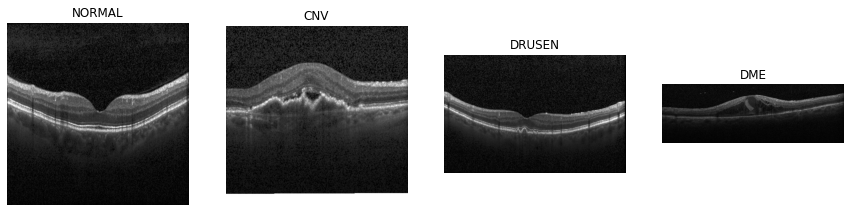

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 10))

normal = random.choice(os.listdir(train_dir + "/NORMAL"))
normal_image = load_img(train_dir + "/NORMAL/" + normal)
ax[0].imshow(normal_image)
ax[0].set_title("NORMAL")
ax[0].axis("Off")

cnv = random.choice(os.listdir(train_dir + "/CNV"))
cnv_image = load_img(train_dir + "/CNV/" + cnv)
ax[1].imshow(cnv_image)
ax[1].set_title("CNV")
ax[1].axis("Off")

drusen = random.choice(os.listdir(train_dir + "/DRUSEN"))
drusen_image = load_img(train_dir + "/DRUSEN/" + drusen)
ax[2].imshow(drusen_image)
ax[2].set_title("DRUSEN")
ax[2].axis("Off")

dme = random.choice(os.listdir(train_dir + "/DME"))
dme_image = load_img(train_dir + "/DME/" + dme)
ax[3].imshow(dme_image)
ax[3].set_title("DME")
ax[3].axis("Off")

plt.show()

# **M1 - 5 Conv2D, 2 Dense, 50 epochs**

In [ ]:
from keras import layers
from keras import models
from keras import regularizers

img_rows = 150
img_cols = 150

m1 = models.Sequential()
m1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
m1.add(layers.MaxPooling2D((2, 2)))
m1.add(layers.Conv2D(64, (3, 3), activation='relu'))
m1.add(layers.MaxPooling2D((2, 2)))
m1.add(layers.Conv2D(64, (3, 3), activation='relu'))
m1.add(layers.MaxPooling2D((2, 2)))
m1.add(layers.Conv2D(128, (3, 3), activation='relu'))
m1.add(layers.MaxPooling2D((2, 2)))
m1.add(layers.Conv2D(128, (3, 3), activation='relu')) 
m1.add(layers.MaxPooling2D((2, 2)))
m1.add(layers.Flatten())
m1.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(0.001), activation='relu'))
m1.add(layers.Dropout(0.3))
m1.add(layers.Dense(4, activation='softmax')) 
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
import tensorflow
from tensorflow.keras.optimizers import Adam

m1.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

+ dropout 0.3, regularizers.l1_l2(0.001), learning rate 1e-4

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_rows, img_cols), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(img_rows, img_cols), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_rows, img_cols), batch_size=32, class_mode='categorical')

Found 16000 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 4)


In [ ]:
his1 = m1.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
500/500 [==============================] - 42s 72ms/step - loss: 8.8475 - acc: 0.4828 - val_loss: 3.9805 - val_acc: 0.8125
Epoch 2/50
500/500 [==============================] - 20s 41ms/step - loss: 2.6620 - acc: 0.6530 - val_loss: 1.5988 - val_acc: 0.8125
Epoch 3/50
500/500 [==============================] - 20s 39ms/step - loss: 1.5292 - acc: 0.7031 - val_loss: 1.0331 - val_acc: 0.8438
Epoch 4/50
500/500 [==============================] - 20s 41ms/step - loss: 1.1509 - acc: 0.7359 - val_loss: 0.7888 - val_acc: 0.9062
Epoch 5/50
500/500 [==============================] - 29s 57ms/step - loss: 0.9601 - acc: 0.7516 - val_loss: 0.6530 - val_acc: 0.8750
Epoch 6/50
500/500 [==============================] - 25s 50ms/step - loss: 0.8436 - acc: 0.7730 - val_loss: 0.5309 - val_acc: 0.9375
Epoch 7/50
500/500 [==============================] - 33s 66ms/step - loss: 0.7576 - acc: 0.7883 - val_loss: 0.6262 - val_acc: 0.8438
Epoch 8/50
500/500 [==============================] - 33s 66ms

In [ ]:
# m1.save(base_dir + 'retinal1.h1')

In [ ]:
import matplotlib.pyplot as plt
    
def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()
    plt.figure(figsize=(25,5))
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf() 
    plt.figure(figsize=(25,5))
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'go', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'g', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

<Figure size 432x288 with 0 Axes>

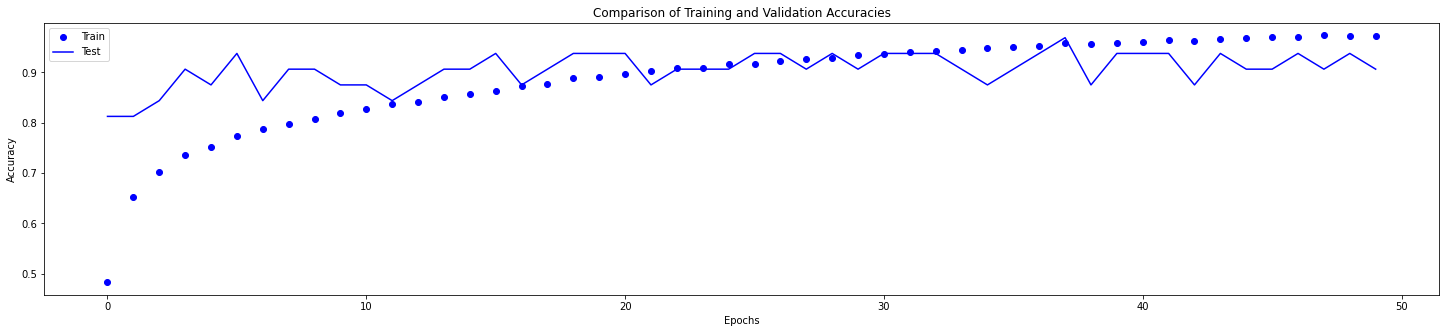

<Figure size 432x288 with 0 Axes>

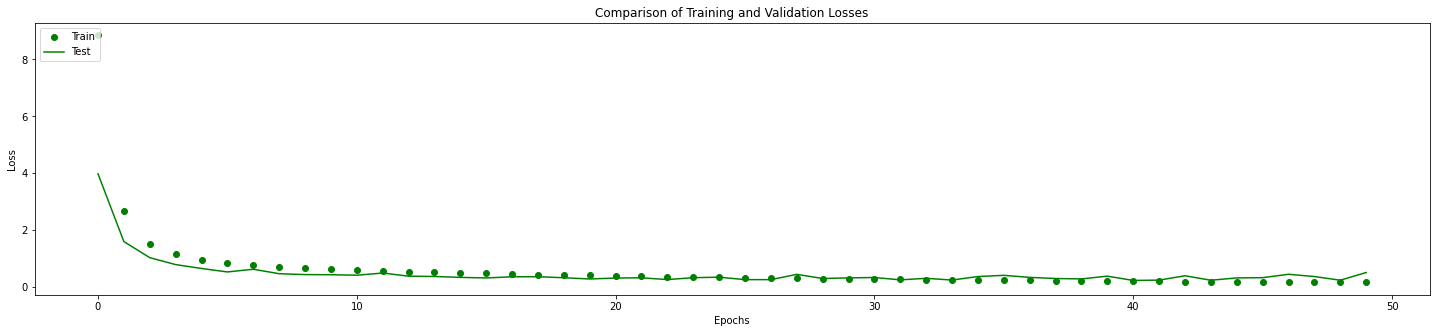

In [ ]:
acc1 = his1.history['acc']
val_acc1 = his1.history['val_acc']
loss1 = his1.history['loss']
val_loss1 = his1.history['val_loss']

PlotAccuracyComparison(acc1, val_acc1, lab = 'M1')
PlotLossComparison(loss1, val_loss1, lab = 'M1')

In [ ]:
argmax1 = np.argmax(val_acc1)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1, 'epoch.')

Max accuracy for model 1 is:  0.96875 , achieved in the  37 epoch.


# **M2 - 8 Conv2D, 2 Dense, 50 epochs**

In [ ]:

m2 = models.Sequential()
m2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
m2.add(layers.MaxPooling2D((2, 2)))
m2.add(layers.Conv2D(32, (3, 3), activation='relu'))
m2.add(layers.MaxPooling2D((2, 2)))
m2.add(layers.Conv2D(64, (3, 3), activation='relu'))
m2.add(layers.MaxPooling2D((2, 2)))
m2.add(layers.Conv2D(64, (3, 3), activation='relu'))
m2.add(layers.Conv2D(128, (3, 3), activation='relu'))
m2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
m2.add(layers.Conv2D(256, (3, 3), activation='relu'))
m2.add(layers.Conv2D(256, (3, 3), activation='relu')) 
m2.add(layers.Flatten())
m2.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(0.001), activation='relu'))
m2.add(layers.Dropout(0.4))
m2.add(layers.Dense(4, activation='softmax')) 
m2.summary()

m2.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
his2 = m2.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
500/500 [==============================] - 3635s 7s/step - loss: 12.8596 - acc: 0.4592 - val_loss: 0.9737 - val_acc: 0.6250
Epoch 2/50
500/500 [==============================] - 71s 142ms/step - loss: 1.0427 - acc: 0.6696 - val_loss: 0.7213 - val_acc: 0.8125
Epoch 3/50
500/500 [==============================] - 71s 141ms/step - loss: 0.8710 - acc: 0.7364 - val_loss: 0.5211 - val_acc: 0.8750
Epoch 4/50
500/500 [==============================] - 71s 143ms/step - loss: 0.7845 - acc: 0.7704 - val_loss: 0.7036 - val_acc: 0.8438
Epoch 5/50
500/500 [==============================] - 71s 141ms/step - loss: 0.7162 - acc: 0.7984 - val_loss: 0.5661 - val_acc: 0.9062
Epoch 6/50
500/500 [==============================] - 71s 142ms/step - loss: 0.6601 - acc: 0.8186 - val_loss: 0.3841 - val_acc: 0.9375
Epoch 7/50
500/500 [==============================] - 72s 144ms/step - loss: 0.6014 - acc: 0.8364 - val_loss: 0.4534 - val_acc: 0.9375
Epoch 8/50
500/500 [==============================] - 7

<Figure size 432x288 with 0 Axes>

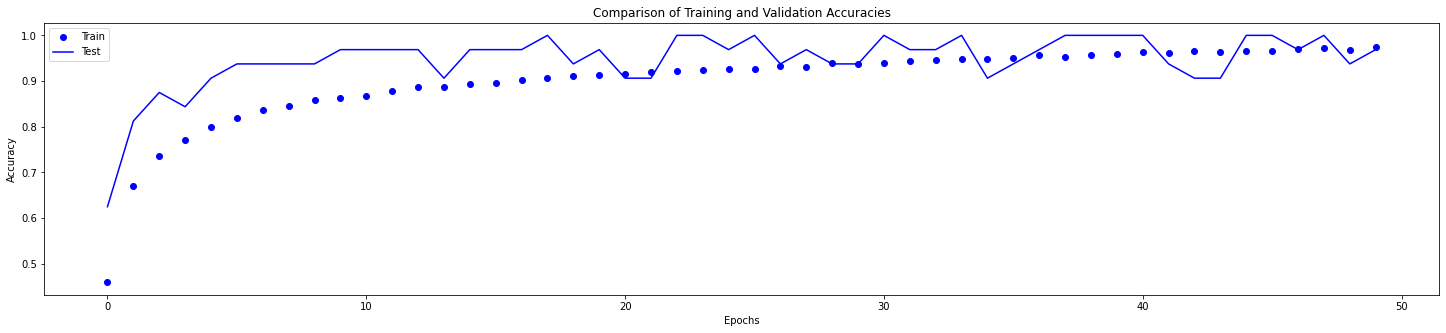

<Figure size 432x288 with 0 Axes>

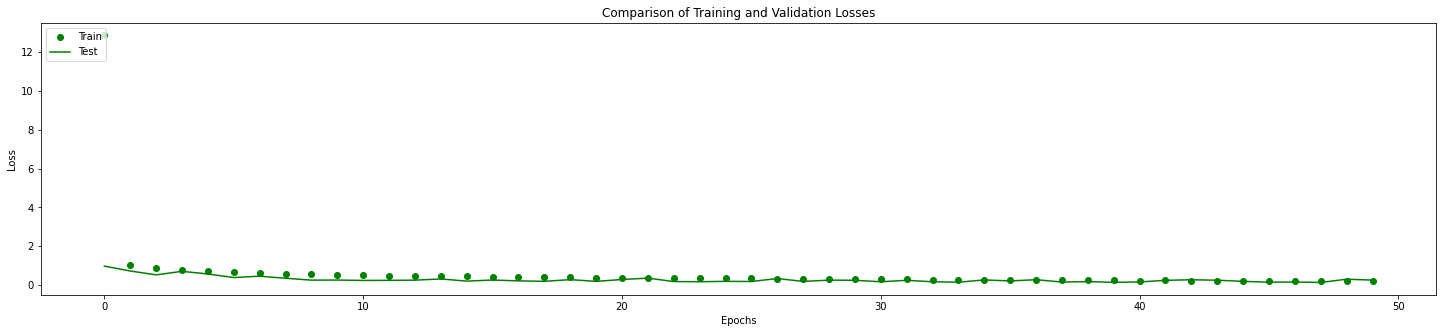

In [ ]:
acc2 = his2.history['acc']
val_acc2 = his2.history['val_acc']
loss2 = his2.history['loss']
val_loss2 = his2.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'M2')
PlotLossComparison(loss2, val_loss2, lab = 'M2')

In [ ]:
argmax2 = np.argmax(val_acc2)
print('Max validation accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2, 'epoch.')
test_loss, test_acc = m2.evaluate(test_generator)
print('test_loss: ', test_loss)
print('test_acc: ', test_acc)

Max validation accuracy for model 2 is:  1.0 , achieved in the  17 epoch.
31/31 [==============================] - 219s 7s/step - loss: 0.3376 - acc: 0.9452
test_loss:  0.3375585675239563
test_acc:  0.9452479481697083


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def show_confusion_matrix(model, test_dir):

  predictions = []
  true_categories = []

  for x , y in test_generator:
    temp = model(x)
    temp = np.array(tf.argmax(temp, axis = 1))
    predictions.append(temp)
    y = np.array(tf.argmax(y, axis = 1))
    true_categories.append(y)

    index = ["NORMAL", "DRUSEN", "DME", "CNV"]
    columns = ["Predicted NORMAL", "Predicted DRUSEN", "Predicted DME", "Predicted CNV"]
    cm = pd.DataFrame(data=confusion_matrix(true_categories, predictions, labels = [0,1,2,3]), index=index, columns=columns)
    data=confusion_matrix(true_categories, predictions, labels=[0,1,2,3])
    report = classification_report(true_categories, predictions)
    sns.heatmap(cm,annot=True, fmt="d")
    print(report)

    return cm, report


In [ ]:
show_confusion_matrix(m2, test_generator)

# **M3 - VGG16, dropout 0.4,  - 50 epochs**

In [ ]:
INPUT_SHAPE = (150, 150, 3)

In [ ]:
vgg16 = tf.keras.applications.VGG16(
    include_top = False, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = INPUT_SHAPE, 
    pooling = None, 
    classes = 1000
)

In [ ]:
vgg16.trainable = False

In [ ]:
m3_vgg16 = tf.keras.models.Sequential([
                                       
    vgg16,
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(100, kernel_regularizer=regularizers.l1_l2(0.001), activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

m3_vgg16.summary()
m3_vgg16.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d_18 (Conv2D)          (None, 2, 2, 64)          294976    
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               25700     
                                                                 
 dense_7 (Dense)             (None, 4)                 404       
                                                                 
Total params: 15,035,768
Trainable params: 321,080
Non

In [ ]:
his3 = m3_vgg16.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
500/500 [==============================] - 22s 42ms/step - loss: 3.2903 - acc: 0.6019 - val_loss: 2.0975 - val_acc: 0.9062
Epoch 2/50
500/500 [==============================] - 21s 42ms/step - loss: 2.0092 - acc: 0.7496 - val_loss: 1.3200 - val_acc: 0.8750
Epoch 3/50
500/500 [==============================] - 21s 42ms/step - loss: 1.4222 - acc: 0.7853 - val_loss: 0.9308 - val_acc: 0.9375
Epoch 4/50
500/500 [==============================] - 21s 42ms/step - loss: 1.1130 - acc: 0.8030 - val_loss: 0.7662 - val_acc: 0.9062
Epoch 5/50
500/500 [==============================] - 21s 42ms/step - loss: 0.9323 - acc: 0.8104 - val_loss: 0.6100 - val_acc: 0.9375
Epoch 6/50
500/500 [==============================] - 21s 42ms/step - loss: 0.8057 - acc: 0.8248 - val_loss: 0.5445 - val_acc: 0.9062
Epoch 7/50
500/500 [==============================] - 21s 42ms/step - loss: 0.7186 - acc: 0.8346 - val_loss: 0.4572 - val_acc: 0.9375
Epoch 8/50
500/500 [==============================] - 21s 42ms

<Figure size 432x288 with 0 Axes>

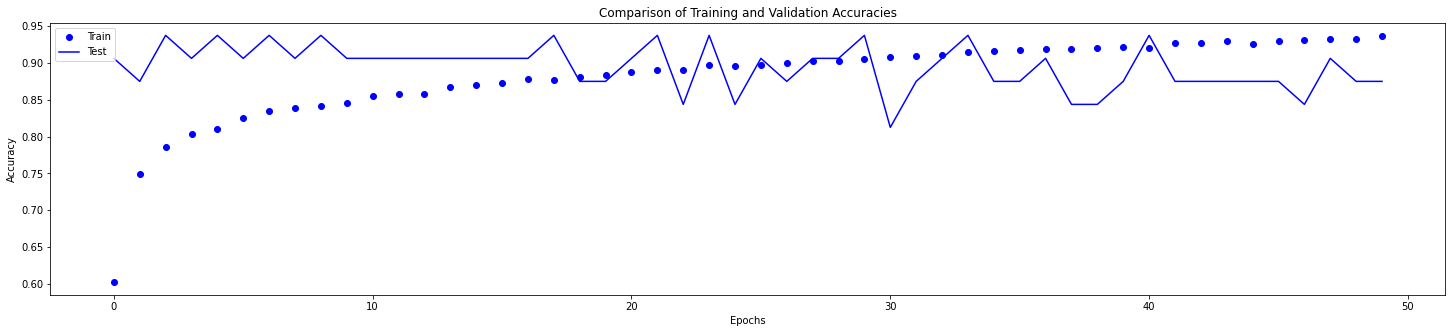

<Figure size 432x288 with 0 Axes>

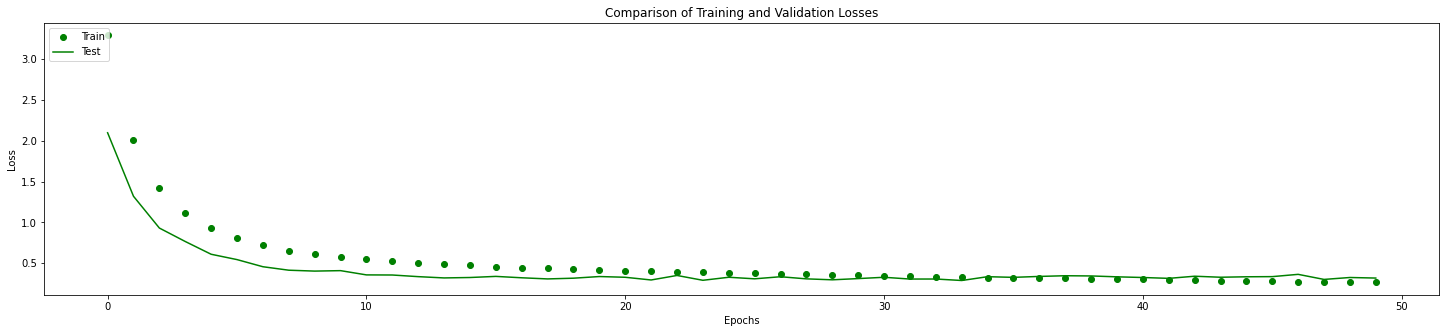

In [ ]:
acc3 = his3.history['acc']
val_acc3 = his3.history['val_acc']
loss3 = his3.history['loss']
val_loss3 = his3.history['val_loss']

PlotAccuracyComparison(acc3, val_acc3, lab = 'M3 VGG16')
PlotLossComparison(loss3, val_loss3, lab = 'M3 VGG16')

In [ ]:
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3, 'epoch.')

Max accuracy for model 3 is:  0.9375 , achieved in the  2 epoch.


#**M4 - VGG16 with pooling, droput 0.5 - 50 epochs**

In [ ]:
vgg16_2 = tf.keras.applications.VGG16(
    include_top = None, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = INPUT_SHAPE, 
    pooling = True, 
    classes = 1000
)

In [ ]:
m4_vgg16 = tf.keras.models.Sequential([
                                       
    vgg16_2,
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, kernel_regularizer=regularizers.l1_l2(0.001), activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

m4_vgg16.summary()
m4_vgg16.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d_19 (Conv2D)          (None, 2, 2, 64)          294976    
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 15,076,484
Trainable params: 15,076,484


In [ ]:
his4 = m4_vgg16.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
500/500 [==============================] - 58s 113ms/step - loss: 5.1866 - acc: 0.5919 - val_loss: 3.0653 - val_acc: 1.0000
Epoch 2/50
500/500 [==============================] - 56s 112ms/step - loss: 2.5112 - acc: 0.9164 - val_loss: 1.6403 - val_acc: 0.9688
Epoch 3/50
500/500 [==============================] - 56s 112ms/step - loss: 1.3745 - acc: 0.9430 - val_loss: 0.9416 - val_acc: 0.9688
Epoch 4/50
500/500 [==============================] - 56s 112ms/step - loss: 0.8216 - acc: 0.9565 - val_loss: 0.5310 - val_acc: 1.0000
Epoch 5/50
500/500 [==============================] - 56s 112ms/step - loss: 0.5317 - acc: 0.9642 - val_loss: 0.3478 - val_acc: 1.0000
Epoch 6/50
500/500 [==============================] - 56s 112ms/step - loss: 0.3703 - acc: 0.9684 - val_loss: 0.2273 - val_acc: 1.0000
Epoch 7/50
500/500 [==============================] - 56s 112ms/step - loss: 0.2685 - acc: 0.9739 - val_loss: 0.1587 - val_acc: 1.0000
Epoch 8/50
500/500 [==============================] - 5

<Figure size 432x288 with 0 Axes>

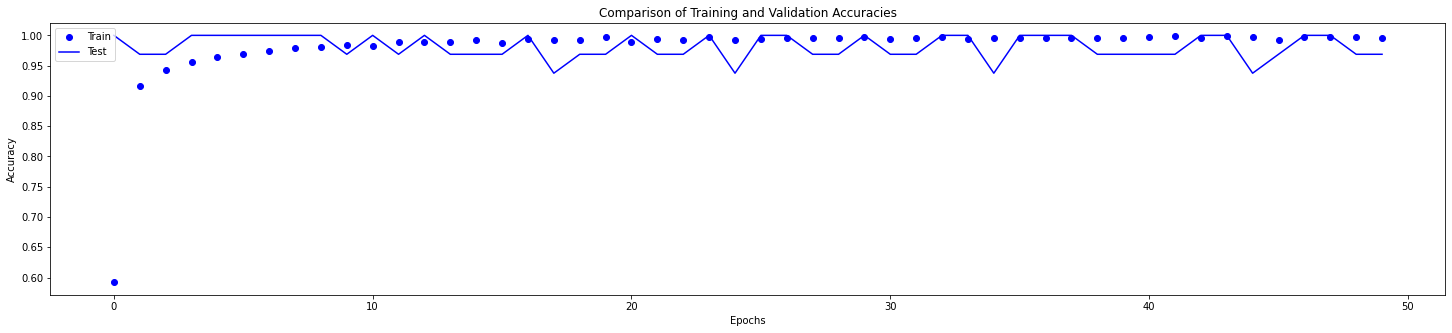

<Figure size 432x288 with 0 Axes>

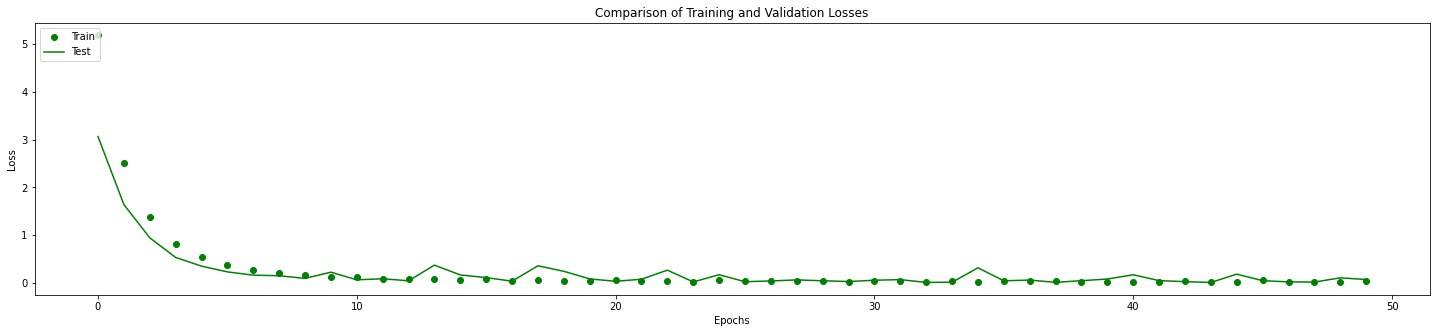

In [ ]:
acc4 = his4.history['acc']
val_acc4 = his4.history['val_acc']
loss4 = his4.history['loss']
val_loss4 = his4.history['val_loss']

PlotAccuracyComparison(acc4, val_acc4, lab = 'M4 VGG16')
PlotLossComparison(loss4, val_loss4, lab = 'M4 VGG16')

In [ ]:
argmax4 = np.argmax(val_acc4)
print ('Max accuracy for model 4 is: ', val_acc4[argmax4], ', achieved in the ', argmax4, 'epoch.')

Max accuracy for model 4 is:  1.0 , achieved in the  0 epoch.


Max accuracy for model 1 is:  0.96875 , achieved in the  37 epoch.
Max accuracy for model 2 is:  1.0 , achieved in the  7 epoch.
Max accuracy for model 3 is:  0.9375 , achieved in the  2 epoch.
Max accuracy for model 4 is:  1.0 , achieved in the  0 epoch.


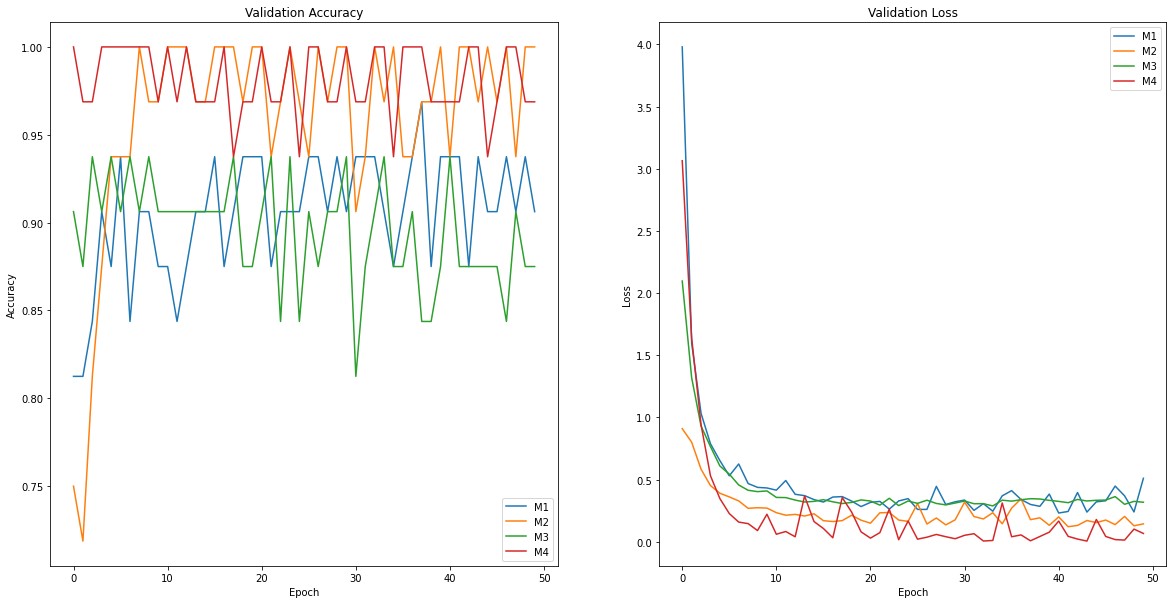

In [ ]:
import matplotlib.pyplot as plt
m = range(50)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(m, val_acc1)
plt.plot(m, val_acc2)
plt.plot(m, val_acc3)
plt.plot(m, val_acc4)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['M1', 'M2', 'M3', 'M4'])
plt.subplot(1,2,2)
plt.plot(m, val_loss1)
plt.plot(m, val_loss2)
plt.plot(m, val_loss3)
plt.plot(m, val_loss4)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['M1', 'M2', 'M3', 'M4'])

print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1, 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2, 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3, 'epoch.')
print ('Max accuracy for model 4 is: ', val_acc4[argmax4], ', achieved in the ', argmax4, 'epoch.')

# **Conclusion**



 *   Better results after adding regulizer and dropout
 *   Regulizer l1_l2(0.001) was the best in this subject 
 * The best learning rate is 1e-4
 *   For CNN network the best was dropout 0.4
 *   For network with VGG16 the best dropout 0.5
 *   More layers in M2 and higher dropout - better results compared to the M1 
 *   VGG16 in M4 with pooling, higher dropout and more neurons in Dens layer - better results compared to the M3
 *   Model M1 and M4 achieved the best results, vall_acc = 1.0
 *   Model M3 achieved the worst results, vall_acc = 0.9375
 *   The best results in another project on Kaggle was 99%
 *   Test accuracy in M2 was 94.5%









